## Batch 7: Comparison of genotypes with and without MB Correction Script

<br>
<br>
#### 9/22/2017


<br>
### Comparison of Heterozygosities:

In [1]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/notebooks'

In [2]:
cd ../analyses

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/analyses


In [3]:
infile = open("batch_7_MB_HetvReadDepth_filtered", "r")
infile.readline()

reads = []
het = []
for line in infile:
    reads.append(float(line.strip().split()[1]))
    het.append(float(line.strip().split()[2]))
infile.close()

In [4]:
infile = open("batch7_HetvReadDepth_filtered", "r")
infile.readline()

het2 = []
reads2 = []
for line in infile:
    het2.append(float(line.strip().split()[2]))
    reads2.append(float(line.strip().split()[1]))
infile.close()

In [5]:
import numpy as np
import matplotlib.pyplot as plt

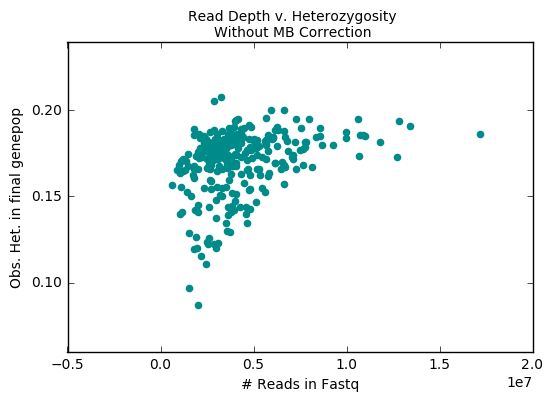

In [7]:
plt.scatter(reads2, het2, color="darkcyan")
plt.suptitle("Read Depth v. Heterozygosity\nWithout MB Correction")
plt.xlabel("# Reads in Fastq")
plt.ylabel("Obs. Het. in final genepop")
plt.show()

In [8]:
plt.close()

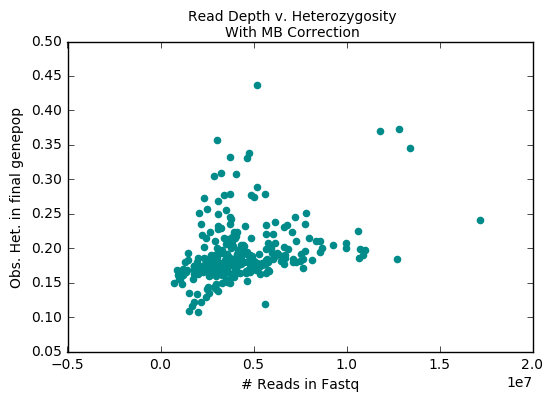

In [9]:
plt.scatter(reads, het, color="darkcyan")
plt.suptitle("Read Depth v. Heterozygosity\nWith MB Correction")
plt.xlabel("# Reads in Fastq")
plt.ylabel("Obs. Het. in final genepop")
plt.show()

In [10]:
plt.close()

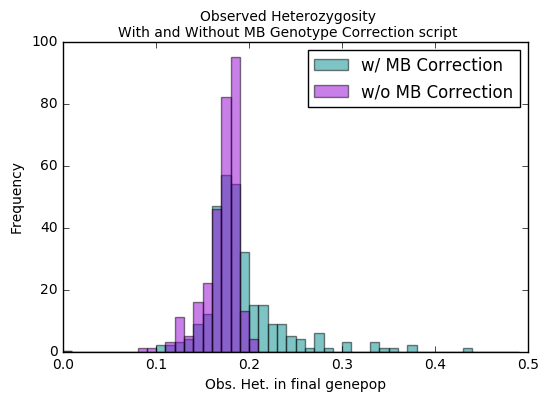

In [11]:
plt.hist(het, color="darkcyan", bins=np.arange(-0.05, 0.45, 0.01)+0.05, alpha = 0.5, label = "w/ MB Correction")
plt.hist(het2, color = "darkviolet", bins=np.arange(-0.05, 0.45, 0.01)+0.05, alpha = 0.5, label = "w/o MB Correction")
plt.suptitle("Observed Heterozygosity\nWith and Without MB Genotype Correction script")
plt.xlabel("Obs. Het. in final genepop")
plt.ylabel("Frequency")
plt.legend()
plt.show()

In [12]:
plt.close()

### Q1: Where Marine's script is calling heterozygotes, what is Stacks calling?

Since I'm working with the same batch here, I know that the same snp is called at each locus. But the filtering steps probably filtered out different loci. 

#### Step One: Find Common Loci

In [13]:
cd ../stacks_b7_wgenome/

/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b7_wgenome


In [14]:
infileMB = open("batch_7_MBCorrectedGenotypes_filteredMAF_filteredIndivids30_filteredLoci_filteredHWE.gen", "r")

MBloci_list = []
MBindices = {}
infileMB.readline()
line=infileMB.readline()
i = 1
while not line.startswith("Pop"):
    locus = line.strip().split()[0]
    MBloci_list.append(locus)
    MBindices[locus] = i
    line=infileMB.readline()
    i += 1
infileMB.close()

infile = open("batch_7.filteredLoci20_filteredMAF_filteredIndivids_filteredHWE.txt", "r")
infile.readline()
loci_list = []
indices = {}
i = 1
for line in infile:
    locus = line.strip().split()[0].split("_")[0]
    loci_list.append(locus)
    indices[locus] = i
    i += 1
infile.close()

In [15]:
matched_loci = [i for i in MBloci_list if i in loci_list]

In [16]:
print len(matched_loci)

3309


In [17]:
indices_matched = []
MBindices_matched = []
for locus in matched_loci:
    indices_matched.append(indices[locus])
    MBindices_matched.append(MBindices[locus])
print len(indices_matched)
print len(MBindices_matched)

3309
3309


#### Step Two: Create separate genepops of only the matched loci

In [26]:
pwd

u'/mnt/hgfs/Pacific cod/DataAnalysis/PCod-Korea-repo/stacks_b7_wgenome'

In [27]:
infile = open("batch_7.filteredLoci20_filteredMAF_filteredIndivids_filteredHWE.txt", "r")
outfile = open("batch_7.filteredLoci20_filteredMAF_filteredIndivids_filteredHWE_matchedMB.txt", "w")
outfile.write(infile.readline())

loci_written = []
for line in infile:
    locus = line.strip().split()[0].split("_")[0]
    if locus in matched_loci:
        loci_written.append(locus)
        outfile.write(line)
infile.close()
outfile.close()

print "The following loci were not properly copied over to the new file:"
print [i for i in matched_loci if i not in loci_written]
    

The following loci were not properly copied over to the new file:
[]


In [29]:
infile = open("batch_7.MBCorrectedGenotypes_filteredMAF_filteredIndivids30_filteredLoci_filteredHWE.txt", "r")
outfile = open("batch_7.MBCorrectedGenotypes_filteredMAF_filteredIndivids30_filteredLoci_filteredHWE_matchedMB.txt", "w")
outfile.write(infile.readline())



loci_writtenMB = []
for line in infile:
    locus = line.strip().split()[0]
    if locus in matched_loci:
        loci_writtenMB.append(locus)
        outfile.write(line)
infile.close()
outfile.close()

print "The following loci were not properly copied over to the new file:"
print [i for i in matched_loci if i not in loci_writtenMB]
    

The following loci were not properly copied over to the new file:
[]
